-- Correlation
liest CSV-Dateien und erstellt eine Korrelationsmatrix.
verwendet getQuotes.sh und revertFiles.sh zum Holen der Daten.

✓ ToDo: Ökoworld Klima und Classic ergänzt

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

historische Kurse holen von hier:  
http://www.ariva.de/dax-index/historische_kurse  
typischerweise ca. 10 Jahre, Trenner ;

In [5]:
wkn2name = {"865985":"Apple", 
            "A1EWWW":"Adidas", 
            "A0WMPJ":"Aixtron", 
            "846900":"DAX",
            "A0KRKM":"Brent Oil",
            "COM062":"Brent Oil (Subst)", 
            "581005":"Deutsche Börse", 
            "555750":"DTE", 
            "927200":"Dialog Semiconductor", 
            "555063":"Drägerwerk",
            "976986":"DWS Akt. St. DL",
            "ETF047":"PSI (ETF047)", 
            "965508":"PSI20", 
            "577220":"Fielmann", 
            "A0Z2ZZ":"Freenet",
            "840221":"Hannover Rück",
            "851399":"IBM",
            "623100":"Infineon",
            "KGX888":"Kion",
            "LS9AJF":"LS9AJF",
            "846741":"MDAX",
            "A0D655":"Nordex",
            "A0HGV0":"MSCI iShares", 
            "A2H9QY":"MSCI Amundi", 
            "918422":"Nvidia",
            "871460":"Oracle",
            "PSM777":"ProSieben",
            "716460":"SAP",
            "A2GS40":"Software AG",
            "716563":"Sartorius",
            "A0AET0":"S&P 500",
            "720327":"TecDAX",
            "850775":"Telefonica",
            "766710":"Vossloh",
            "LS9CTA":"LS9CTA", 
            "LS9HYC":"LS9HYC", 
            "973277":"Fid. Nordic",
            "973270":"Fid. Eur Gr.",
            "973346":"Nordea 1 Nordic",
            "977479":"Lingohr",
            "A1103F":"XTr MinVol",
            "A0Q9NX":"SEB Nordic Small Caps", 
            "A1W4TN":"Fid. Gl.Tec", 
            "978041":"LBBW", 
            "A0MX8G":"Öko Klima", 
            "974968":"Ökovision"}

name2wkn = {}
for wkn, name in wkn2name.items():
  name2wkn[name] = wkn
name2wkn['Apple']

'865985'

In [6]:
data_dir = "data/"

def get_filename(wp_name):
    return  data_dir+name2wkn[wp_name]+".csv"

The following cell prepares the data:
- read filename
- we might want to resample for weekly changes: quotes_fridays = quotes.resample("W-FRI").last()
- calculate percent changes

The weekly changes may be replaced with monthly or quarterly changes:
Take BQ, BM for business quarter resp. business month 
Details see: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

In [7]:
sec_names = ["DAX","Drägerwerk","Infineon","MSCI Amundi","TecDAX", "Fid. Gl.Tec", "LBBW","LS9AJF", "MSCI iShares","Fid. Nordic", 
            "DTE", "Brent Oil", "Fid. Eur Gr.", "DWS Akt. St. DL","XTr MinVol","SEB Nordic Small Caps", "Öko Klima", "Ökovision"]


merged = pd.DataFrame()
pct_changes = pd.DataFrame()
last_suffix = ''
for e in sec_names:
    quotes = pd.read_csv(get_filename(e), sep=';', header=0)
    if merged.size == 0:
        merged = quotes
    else:
        merged = pd.merge(merged, quotes, on='Date', suffixes=(last_suffix,'_'+e))
    last_suffix = '_'+e
    
merged.columns=["Date"]+sec_names

merged

,Date,DAX,Drägerwerk,Infineon,MSCI Amundi,TecDAX,Fid. Gl.Tec,LBBW,LS9AJF,MSCI iShares,Fid. Nordic,DTE,Brent Oil,Fid. Eur Gr.,DWS Akt. St. DL,XTr MinVol,SEB Nordic Small Caps,Öko Klima,Ökovision
0,2019-09-27,12380.94,41.24,16.606,55.4137,2822.69,27.16,42.4002,379.2495,45.9547,1301.0,15.362,26.370,15.436,396.693,31.1471,449.845,77.57,188.07
1,2019-09-30,12428.08,40.72,16.512,55.7530,2814.36,27.24,42.5051,383.6085,46.0508,1309.0,15.394,25.920,15.578,400.208,31.2644,452.673,76.67,186.81
2,2019-10-01,12263.83,41.24,16.360,55.1259,2790.72,27.10,42.1806,383.2670,45.5968,1301.0,15.338,25.506,15.337,392.719,31.0614,449.315,77.44,188.00
3,2019-10-02,11925.25,43.92,15.864,54.0383,2720.57,26.44,41.2070,378.0305,44.8135,1277.0,15.052,24.570,14.893,382.547,30.6714,439.594,76.61,185.86
4,2019-10-04,12012.81,45.38,16.074,54.7024,2770.00,26.92,41.4647,383.6045,45.5033,1279.0,15.132,25.020,15.015,389.145,31.0308,441.535,75.99,183.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2020-03-19,8610.43,67.00,11.220,44.3869,2273.21,23.75,25.6900,267.8690,36.0097,892.4,11.538,13.125,11.364,259.131,25.9337,350.715,67.87,159.43
114,2020-03-20,8928.95,68.60,11.474,43.3105,2349.03,24.02,26.7200,278.9155,35.0864,888.8,12.086,14.043,11.035,255.028,25.1040,361.911,69.21,162.13
115,2020-03-23,8741.15,73.80,11.468,41.7581,2316.88,23.34,26.0200,275.6390,34.0506,851.4,11.462,12.714,10.701,253.115,24.0734,341.746,68.46,161.28
116,2020-03-24,9700.57,77.50,13.070,45.3042,2491.41,25.04,28.7900,304.0150,37.0388,901.2,12.034,13.543,11.557,297.572,25.6313,367.521,68.83,159.64


In [8]:
pct_changes = pd.DataFrame()
for e in sec_names:
    pct_changes[e] = merged[e].pct_change().copy()

In [9]:
pct_changes

,DAX,Drägerwerk,Infineon,MSCI Amundi,TecDAX,Fid. Gl.Tec,LBBW,LS9AJF,MSCI iShares,Fid. Nordic,DTE,Brent Oil,Fid. Eur Gr.,DWS Akt. St. DL,XTr MinVol,SEB Nordic Small Caps,Öko Klima,Ökovision
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.003807,-0.012609,-0.005661,0.006123,-0.002951,0.002946,0.002474,0.011494,0.002091,0.006149,0.002083,-0.017065,0.009199,0.008861,0.003766,0.006287,-0.011602,-0.006700
2,-0.013216,0.012770,-0.009205,-0.011248,-0.008400,-0.005140,-0.007634,-0.000890,-0.009859,-0.006112,-0.003638,-0.015972,-0.015471,-0.018713,-0.006493,-0.007418,0.010043,0.006370
3,-0.027608,0.064985,-0.030318,-0.019729,-0.025137,-0.024354,-0.023082,-0.013663,-0.017179,-0.018447,-0.018646,-0.036697,-0.028950,-0.025901,-0.012556,-0.021635,-0.010718,-0.011383
4,0.007342,0.033242,0.013238,0.012289,0.018169,0.018154,0.006254,0.014745,0.015393,0.001566,0.005315,0.018315,0.008192,0.017248,0.011718,0.004415,-0.008093,-0.013290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0.019986,-0.138264,0.050759,0.020306,0.032231,0.037571,0.030485,0.015394,0.007402,0.002246,0.065177,0.047737,0.057608,0.079712,0.002520,0.026728,-0.019786,-0.022861
114,0.036992,0.023881,0.022638,-0.024250,0.033354,0.011368,0.040093,0.041238,-0.025640,-0.004034,0.047495,0.069943,-0.028951,-0.015834,-0.031993,0.031923,0.019744,0.016935
115,-0.021033,0.075802,-0.000523,-0.035844,-0.013687,-0.028310,-0.026198,-0.011747,-0.029521,-0.042079,-0.051630,-0.094638,-0.030267,-0.007501,-0.041053,-0.055718,-0.010837,-0.005243
116,0.109759,0.050136,0.139693,0.084920,0.075330,0.072836,0.106457,0.102946,0.087758,0.058492,0.049904,0.065204,0.079993,0.175640,0.064715,0.075422,0.005405,-0.010169


In [10]:
corr = pct_changes.corr()
corr

,DAX,Drägerwerk,Infineon,MSCI Amundi,TecDAX,Fid. Gl.Tec,LBBW,LS9AJF,MSCI iShares,Fid. Nordic,DTE,Brent Oil,Fid. Eur Gr.,DWS Akt. St. DL,XTr MinVol,SEB Nordic Small Caps,Öko Klima,Ökovision
DAX,1.000000,0.047700,0.829371,0.810364,0.943182,0.897098,0.976650,0.839554,0.827494,0.886218,0.825872,0.707594,0.884209,0.910873,0.748448,0.908424,0.203868,0.128568
Drägerwerk,0.047700,1.000000,-0.002728,0.002738,0.081874,-0.002246,0.036532,0.055371,0.030862,0.069387,-0.062588,-0.078789,-0.023128,-0.087730,-0.046874,-0.072473,-0.049401,-0.079231
Infineon,0.829371,-0.002728,1.000000,0.718343,0.830154,0.818047,0.797087,0.744470,0.732493,0.775672,0.590564,0.624434,0.776662,0.819075,0.621524,0.781901,0.070770,0.027001
MSCI Amundi,0.810364,0.002738,0.718343,1.000000,0.747357,0.798100,0.842650,0.838581,0.981314,0.829990,0.673673,0.685335,0.840598,0.868509,0.956737,0.777559,-0.109576,-0.167406
TecDAX,0.943182,0.081874,0.830154,0.747357,1.000000,0.903448,0.917239,0.802653,0.764563,0.864188,0.778251,0.686594,0.851010,0.844526,0.664784,0.895625,0.233286,0.152045
Fid. Gl.Tec,0.897098,-0.002246,0.818047,0.798100,0.903448,1.000000,0.871988,0.746070,0.783492,0.859114,0.731437,0.730047,0.859146,0.858238,0.718689,0.864821,0.246329,0.157836
LBBW,0.976650,0.036532,0.797087,0.842650,0.917239,0.871988,1.000000,0.860291,0.855337,0.904104,0.833596,0.726384,0.896519,0.895796,0.781210,0.915383,0.187593,0.117130
LS9AJF,0.839554,0.055371,0.744470,0.838581,0.802653,0.746070,0.860291,1.000000,0.873288,0.823876,0.675872,0.663007,0.784220,0.828946,0.755137,0.848936,-0.002263,-0.053326
MSCI iShares,0.827494,0.030862,0.732493,0.981314,0.764563,0.783492,0.855337,0.873288,1.000000,0.840862,0.666065,0.659140,0.865199,0.880480,0.938402,0.805853,-0.089946,-0.145523
Fid. Nordic,0.886218,0.069387,0.775672,0.829990,0.864188,0.859114,0.904104,0.823876,0.840862,1.000000,0.726989,0.739733,0.843417,0.823843,0.762092,0.896726,0.186146,0.120280


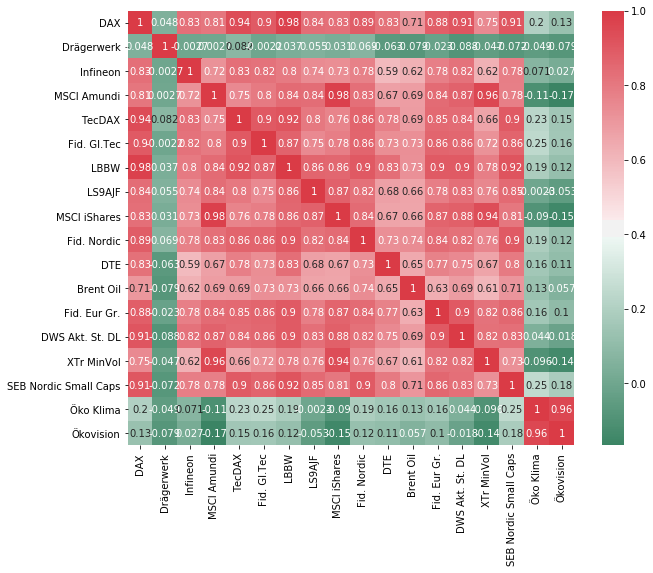

In [11]:
fig, ax = plt.subplots(figsize=(10,8))         # Sample figsize in inches

#corr.style.background_gradient(cmap='coolwarm')
cmap = sns.diverging_palette(150, 10, as_cmap=True)

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cbar_kws={},cmap = cmap, annot=True, ax=ax)

In [12]:
#End